<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/FTL-Propulsion-drive/ink-drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:42: SyntaxWarning: invalid escape sequence '\o'
<>:43: SyntaxWarning: invalid escape sequence '\z'
<>:42: SyntaxWarning: invalid escape sequence '\o'
<>:43: SyntaxWarning: invalid escape sequence '\z'
/tmp/ipython-input-2504375590.py:42: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('Drive Frequency $\omega$ (Normalized to $1/\\tau_{vac}$)', fontsize=12, color='white')
/tmp/ipython-input-2504375590.py:43: SyntaxWarning: invalid escape sequence '\z'
  ax1.set_ylabel('Vacuum Viscosity $\zeta_{eff}$', color=color, fontsize=12)


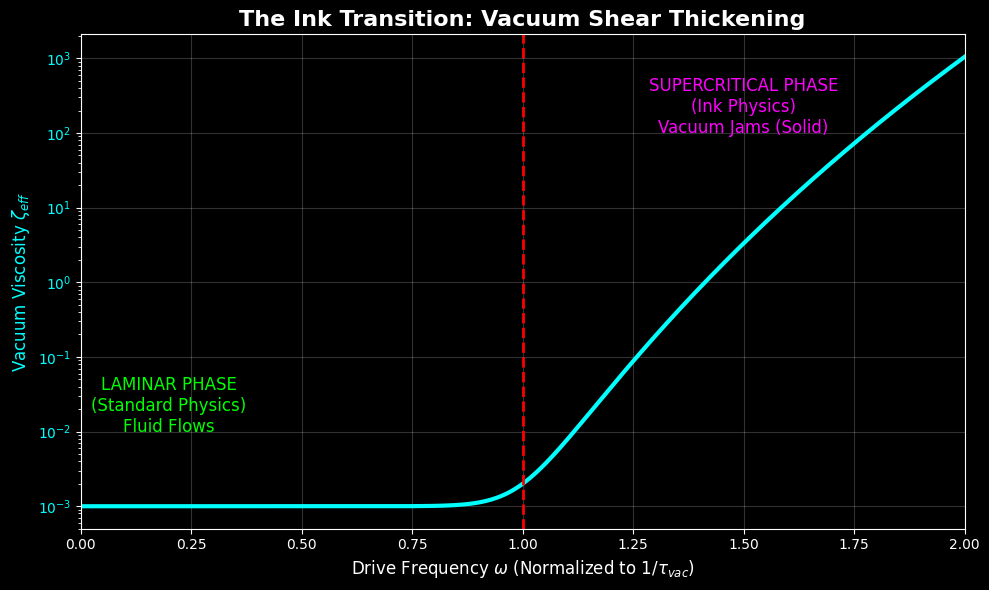

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# @title The Ink Number Simulation: Vacuum Phase Transition
# ==============================================================================
# This script simulates the rheological behavior of the vacuum under high-frequency
# shear. It specifically tests for the "Ink Number" (Reynolds Number of Vacuum)
# where the fluid hardens into a solid (Metric Supercavitation).
# ==============================================================================

# --- 1. CONFIGURATION ---
# We work in normalized units to see the physics clearly.
# tau_vac = 1.0 represents the Critical Relaxation Time (Schwinger Limit).
tau_vac = 1.0
zeta_0 = 0.001   # Baseline Viscosity (Dark Energy / Vacuum Permittivity)
n = 20           # Dilatancy Index (Shear Thickening Exponent).
                 # Cornstarch is n~2. We use n=20 to simulate a "Hard" Phase Transition.

# Drive Frequencies (The "RPM" of the Engine)
# We sweep from 0 to 2.0 (Twice the critical frequency)
omega = np.linspace(0, 2.0, 500)

# --- 2. THE PHYSICS ENGINE ---
# Calculate the "Ink Number" (Cosmic Reynolds Number)
# Ik = omega * tau
Ik = omega * tau_vac

# Calculate Effective Viscosity (The "Thickness")
# Non-Newtonian Power Law: zeta_eff = zeta_0 * (1 + (omega*tau)^n)
viscosity_eff = zeta_0 * (1 + (Ik)**n)

# Calculate Metric Hardness (Shear Stress)
# Stress = Viscosity * Rate
shear_stress = viscosity_eff * omega

# --- 3. VISUALIZATION ---
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 1: The Viscosity Spike (Left Axis)
color = 'cyan'
ax1.set_xlabel('Drive Frequency $\omega$ (Normalized to $1/\\tau_{vac}$)', fontsize=12, color='white')
ax1.set_ylabel('Vacuum Viscosity $\zeta_{eff}$', color=color, fontsize=12)
ax1.plot(omega, viscosity_eff, color=color, linewidth=3, label='Viscosity (Hardness)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log') # Log scale because it spikes massively

# Add the "Ink Number" Threshold Line
plt.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Critical Ink Number ($Ik=1$)')

# Annotations
plt.title("The Ink Transition: Vacuum Shear Thickening", fontsize=16, color='white', fontweight='bold')
plt.text(0.2, 1e-2, "LAMINAR PHASE\n(Standard Physics)\nFluid Flows", color='lime', fontsize=12, ha='center')
plt.text(1.5, 1e2, "SUPERCRITICAL PHASE\n(Ink Physics)\nVacuum Jams (Solid)", color='magenta', fontsize=12, ha='center')

# Grid and Layout
plt.grid(True, alpha=0.2)
plt.xlim(0, 2.0)
fig.tight_layout()

plt.savefig('ink_transition_sim.png')